___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import squarify

import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings                      
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook   bu notebook zorlar ancak interaktif olarak imkan sağlar.

plt.rcParams["figure.figsize"] = (10,6)   # tüm grafikleri bu ölcüye sabitledik.
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")             # çizime özel yapılabilsede gridleri beyaz yaptı.
pd.set_option('display.float_format', lambda x: '%.3f' % x)   # tüm floatları virgülden sonra 3 karakter verir.

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [ ]:
df1=pd.read_csv('HR_Dataset.csv')
df=df1.copy()
df

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "")

In [ ]:
print("Summary of Dataset:")
#exploring the unique values of each attribute
print("Shape: ", '\n', df.shape)
print('*'*100)
print("Info: ", '\n', df.info())
print('*'*100)
print("Number of Uniques: ", '\n', df.nunique())
print('*'*100)
print('Dupplicate entries: {}'.format(df.duplicated().sum()))
print('*'*100)
print("Missing Values:", '\n', df.isnull().sum().sort_values(ascending = False))
#print("Percentage of customers NA: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df

In [ ]:
def color_red(val):   
    
    if (val > 0.90 and val < 0.99) and (val > -0.90 and val < -0.99) :  
        color = 'red'
    else:
        color = 'white'
    return f'color: {color}'

pd.DataFrame(df).corr().style.applymap(color_red)

In [ ]:
df.describe(include="all").T

In [ ]:
index = 0
for feature in df.columns:
        index += 1
        print(df[feature].name)
        print("***********")
        print(df[feature].value_counts())

In [ ]:
df.hist(bins=30, figsize=(20,20), color='b', alpha=0.6)
plt.show()

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [ ]:
print("Percentage of Nulls: ", "%", round(df["left"].isnull().sum() / df.shape[0]*100, 2))
print("Number of Nulls    : ", df["left"].isnull().sum())
print("Number of Uniques  : ", df["left"].nunique())
print("Duplicates         : ", df.duplicated(subset = None, keep = 'first').sum())

print(df["left"].value_counts(dropna = False))
print(f'Percentage of left-1: % {round(df["left"].value_counts(normalize=True)[1]*100,2)} --> \
({df["left"].value_counts()[1]} observations for left-1)\nPercentage of left-0: % {round(df["left"].value_counts(normalize=True)[0]*100,2)} --> ({df["left"].value_counts()[0]} observations for left-0)')

In [ ]:
df.groupby('left').mean()

In [ ]:
df[df['left'] == 1].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'])

In [ ]:
df[df['left'] == 0].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'])

In [ ]:
df.groupby("left")[["satisfaction_level", "promotion_last_5years"]].mean()

In [ ]:
df.groupby(["salary", "left"])[["satisfaction_level", "promotion_last_5years"]].mean()

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x ="left", data = df)
plt.title('left Column Distribution')
ax.bar_label(ax.containers[0]);

In [ ]:
plt.figure(figsize=(8,8))
explode = [0, 0.1]
plt.pie(df['left'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['continued','left'])
plt.title('"left" Distribution')
plt.axis('off')

In [ ]:
pd.crosstab(df['satisfaction_level'], df['left']).iplot(kind='bar', title = 'satisfaction_level and left')

Normalde çalışanlardan ayrılanların düşük bir memnuniyet düzeyinde olması beklenirken yukarıdaki grafik tam olarak bunu yansıtmıyor.

0-1 arasında memnuniyetsizlik oranı yüksek olanların ayrılanların oluşturması normal bir durum.

Ancak 0.35-0.45 arasında memnuniyete sahip olup ayrılanların olduğunu görüyoruz.

Buna ilave olarak memnuniyet düzeyi ortalamanın üzerinde olan bir grup çalışan da şirketten ayrılmış gözüküyor. Bu ise çok mantıklı bir durum değil.

Bu durumda;

Memnuniyet düzeyinin değerlendirilmesi ile ayrılmalar arasında doğru bir orantı olmayabileceğini, bazı çalışanlar gerçek duygularını gizlemiş olabileceğini sonucuna varabiliriz.

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x ="number_project", data = df)
plt.title('number_project Column Distribution')
ax.bar_label(ax.containers[0]);

In [ ]:
pd.crosstab(df['number_project'], df['left']).iplot(kind='bar', title = 'number_project and left')

Yine yukarıdaki grafikte proje sayısı arttıkça kişinin şirkete ait aidiyat duygusunun artması ve sonucunda işten ayrılma durumunun azalması veya tam tersi iş yükü arttıkça işten ayrılma olasılığının artması gibi bir durum beklenirken burada ise proje sayısı ile işten ayrılma arasında yine doğrusal bir ilişkiden söz etmemiz mümkün gibi gözükmüyor.

Ayrıca 2 projede çalışanlarda ayrılma sayısındaki fazla olma durumunu kişinin şirkette kendisini değersiz hissetmesi ile açıklayabiliriz.

İlaveten proje sayısı arttıkça ayrılmaların artmasını ise kişinin iş yükü artması ile şirketin çalışanlarına sunduğu motivasyon hususlarındaki yetersizliği olabilir.

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x ="time_spend_company", data = df)
plt.title('time_spend_company Column Distribution')
ax.bar_label(ax.containers[0]);

In [ ]:
pd.crosstab(df['time_spend_company'], df['left']).iplot(kind='bar', title = 'time_spend_company and left')

Yukarıdaki grafiğe göre 3-6 yılları arasında işten ayrılmaların yoğunlaştığını görebiliyoruz. Bunu da şirketin tecrübeleri çalışanlara fırsatlar sunma konusunda izlediği politikalardan kaynaklı olabileceğini değerlendiriyorum.

Bunu ilk 2-3 yıl şirket içindeki gerek iş yoğunluklarının fazla olmaması gerekse şirket hakkında kafalarında daha net bir durumun oluşmamasına bağlayabiliriz. Ancak 4 yıldan sonra muhtemelen iş yükünün artması ile birlikte kalıp gitme konusunu yoğun olarak düşündüklerini söyleyebiliriz. Özellikle 6. yıldan sonra kafalarında kalma konusunda net bir karar verdiklerini söyleyebiliriz.

### Subplots of Features

You can use the methods of the matplotlib.

In [ ]:
fig = px.box(df, x = 'time_spend_company', y = 'number_project', title = "'time_spend_company' & 'average_montly_hours'")
fig.show()

Yukarıdaki grafikten 4. yıldaki proje sayısının çok fazla olduğunu daha sonra ise daha stabil bir görünüm sergilediğini görüyorum.

In [ ]:
px.histogram(df, x = df['average_montly_hours'], color='left', title = 'left and average_montly_hours')

Görüldüğü gibi aylık çalışma saatleri 150 ve 250 civarı ayrılmaların arttığını görüyoruz. 

In [ ]:
px.histogram(df, x = df['average_montly_hours'], color='satisfaction_level', title = 'satisfaction_level and average_montly_hours')

In [ ]:
px.histogram(df, x = df['average_montly_hours'], color='time_spend_company', title = 'time_spend_company and average_montly_hours')

In [ ]:
px.histogram(df, x = df['average_montly_hours'], color='salary', title = 'average_montly_hours and salary')

In [ ]:
px.histogram(df, x = df['salary'], color='left', title = 'salary and left')

Grafikten maaş durumu ile ayrılma durumu arasında doğrusal bir ilişkinin olduğunu görebiliyorum.

In [ ]:
print(df.columns.tolist())

In [ ]:
pd.crosstab(df['departments'], df['left']).iplot(kind='bar', title = 'department and left')

Her departman da işten ayrılmaların olduğu ancak sales de bunun biraz daha yüksek olduğunu görmekteyiz. Bu şirketin satış alanında hedeflerini yakalamada başarısızlık durumu olduğunda bunun faturasının çalışanlara kesildiği şeklinde de değerlendirebiliriz.

In [ ]:
for i in df.drop(['left'], axis = 1).select_dtypes('number').columns:
    df[i].iplot(kind = 'box', title = i, boxpoints = 'all')

In [ ]:
sns.pairplot(df, hue = "left", corner = True);

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap (df.corr(), annot = True, fmt = '.2f', vmin = -1, vmax = 1)
plt.xticks(rotation = 45);

In [ ]:
df.corr()["left"].sort_values().drop('left').iplot(kind = 'barh');

In [ ]:
for i in df:
    df[i].iplot(kind = 'histogram', subplots = True, bins = 50, title = 'Subplots of Features')

In [ ]:
features=['number_project','time_spend_company','work_accident','left', 'promotion_last_5years','departments','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [ ]:
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [118]:
df_new = df.drop('left', axis = 1)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,0,sales,low
1,0.800,0.860,5,262,6,0,0,sales,medium
2,0.110,0.880,7,272,4,0,0,sales,medium
3,0.720,0.870,5,223,5,0,0,sales,low
4,0.370,0.520,2,159,3,0,0,sales,low


#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [119]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df_new['salary']=le.fit_transform(df_new['salary'])
df_new['departments']=le.fit_transform(df_new['departments'])

In [120]:
df_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,0.380,0.530,2,157,3,0,0,7,1
1,0.800,0.860,5,262,6,0,0,7,2
2,0.110,0.880,7,272,4,0,0,7,2
3,0.720,0.870,5,223,5,0,0,7,1
4,0.370,0.520,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
11995,0.900,0.550,3,259,10,1,1,4,0
11996,0.740,0.950,5,266,10,0,1,4,0
11997,0.850,0.540,3,185,10,0,1,4,0
11998,0.330,0.650,3,172,10,0,1,5,0


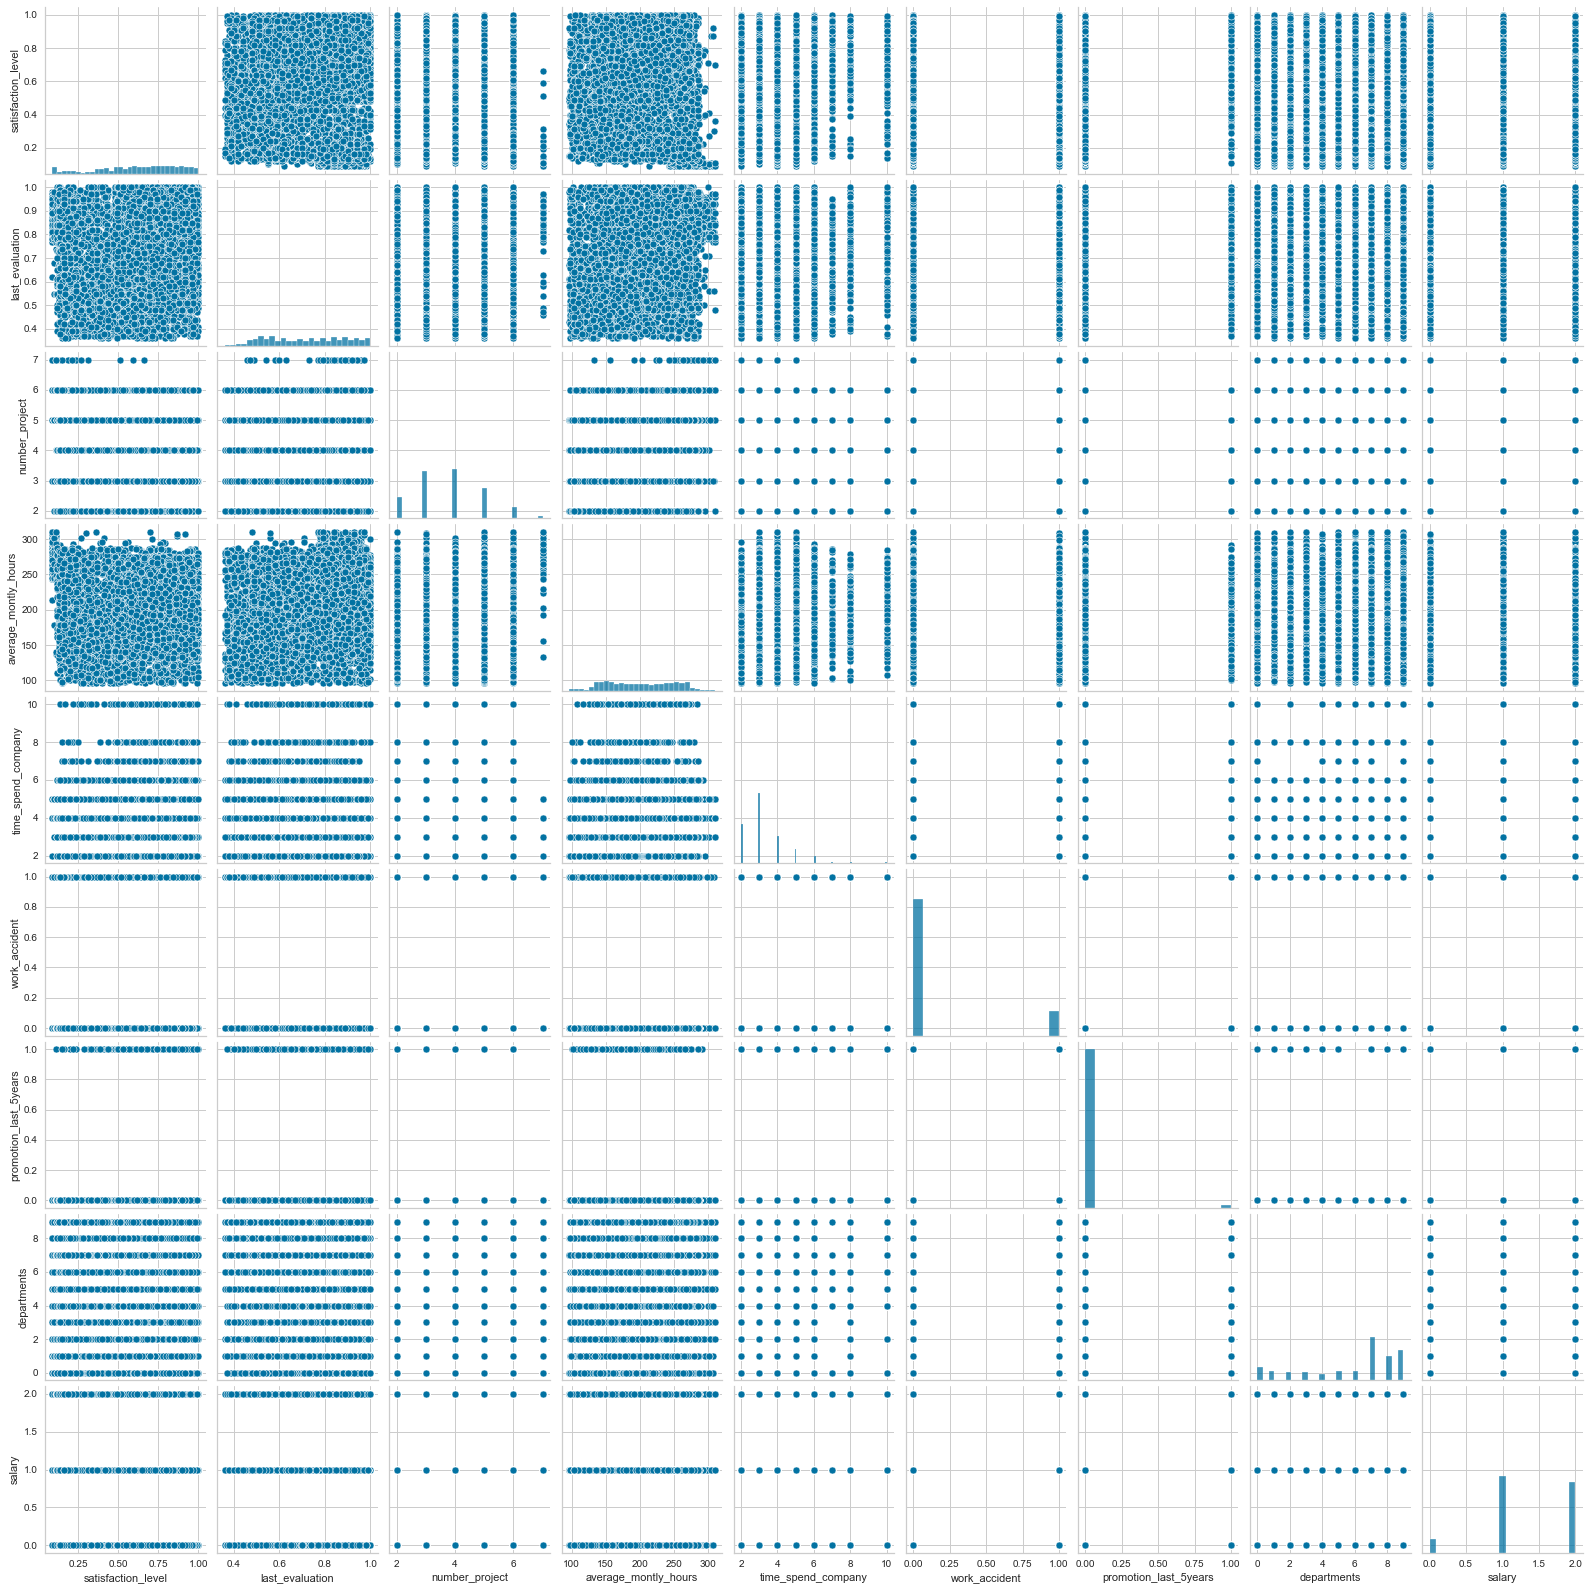

In [131]:
sns.pairplot(df_new)
plt.show()

In [121]:
scaler = MinMaxScaler()
scaler.fit(df_new)

<IPython.core.display.Javascript object>

MinMaxScaler()

In [122]:
df_scaled= scaler.transform(df_new)

In [123]:
X = df_scaled.copy()
X

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 0.77777778,
        0.5       ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.77777778,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.77777778,
        1.        ],
       ...,
       [0.83516484, 0.28125   , 0.2       , ..., 1.        , 0.44444444,
        0.        ],
       [0.26373626, 0.453125  , 0.2       , ..., 1.        , 0.55555556,
        0.        ],
       [0.45054945, 0.578125  , 0.4       , ..., 0.        , 0.        ,
        0.5       ]])

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [132]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=2, random_state=42)

In [133]:
K_means_model.fit(X)

KMeans(n_clusters=2, random_state=42)

In [134]:
K_means_model.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [135]:
from pyclustertend import hopkins

In [136]:
X.shape

(11991, 9)

In [137]:
hopkins(X, X.shape[0])

0.18574400939419825

In [138]:
ssd = []

K = range(2,10)                                          # k icin aralik.

for k in K:
    model = KMeans(init='k-means++',n_clusters =k, random_state=42)
    model.fit(X)                                         # Her yeni k sayisina gore modeli egit.
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

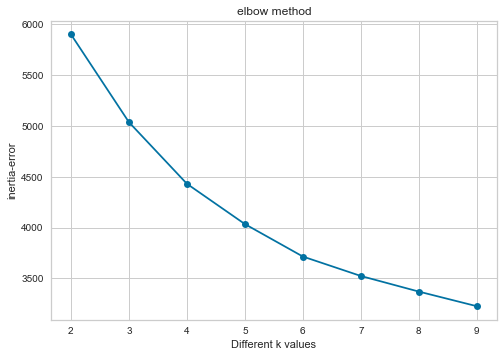

In [139]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [140]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,862.838
3,605.079
4,395.917
5,318.998
6,190.962
7,153.338
8,143.674


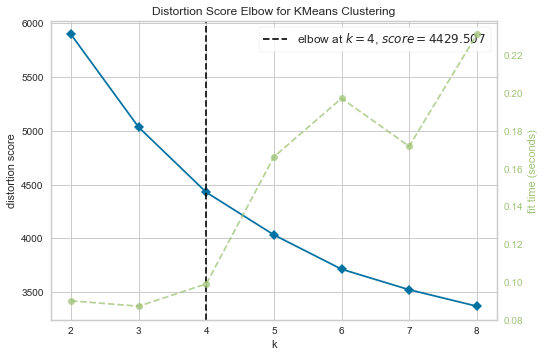

In [141]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

In [142]:
from sklearn.metrics import silhouette_score

In [143]:
silhouette_score(X, K_means_model.fit_predict(X))

0.32069871129241667

In [144]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(init='k-means++',n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.32069871129241667
For n_clusters=3, the silhouette score is 0.22209922292746462
For n_clusters=4, the silhouette score is 0.19906746316679588
For n_clusters=5, the silhouette score is 0.2104284668094636
For n_clusters=6, the silhouette score is 0.20806797026856516
For n_clusters=7, the silhouette score is 0.20922917244172812
For n_clusters=8, the silhouette score is 0.2049820407574877


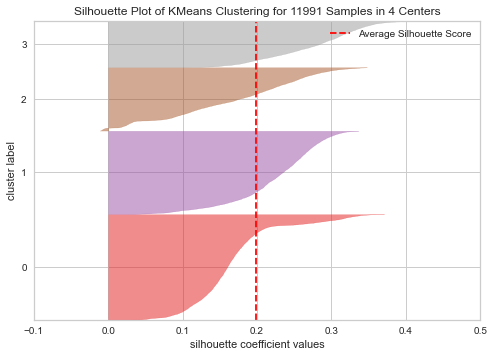

In [145]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [146]:
model = KMeans(n_clusters =4, random_state=42)
model.fit_predict(X)

array([0, 1, 1, ..., 0, 0, 2])

In [147]:
clusters = model.labels_

In [148]:
X

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 0.77777778,
        0.5       ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.77777778,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.77777778,
        1.        ],
       ...,
       [0.83516484, 0.28125   , 0.2       , ..., 1.        , 0.44444444,
        0.        ],
       [0.26373626, 0.453125  , 0.2       , ..., 1.        , 0.55555556,
        0.        ],
       [0.45054945, 0.578125  , 0.4       , ..., 0.        , 0.        ,
        0.5       ]])

In [149]:
X["predicted_clusters"] = clusters

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
rfm_level = rfm.RFM_Level

In [ ]:
rfm_level

In [ ]:
rfm_level.to_csv("rfm_level.csv", index=False)

In [ ]:
levels = pd.read_csv("rfm_level.csv")
levels

In [ ]:
X["levels"] = levels

In [ ]:
X.head()

In [ ]:
ct = pd.crosstab(X.predicted_clusters, X.levels)
ct

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
adjusted_rand_score(X.levels, X.predicted_clusters)

In [ ]:
centers = model.cluster_centers_
centers

In [ ]:
centers[:,0]

In [ ]:
plt.scatter(centers[:,0], centers[:,1], c = "black")

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

### #Gradient Boosting Classifier

#### Model Building

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [ ]:
pip install yellowbrick

#### Prediction

### #KNeighbors Classifier

#### Model Building

#### Evaluating Model Performance

#### Prediction

### #Random Forest Classifier

#### Model Building

#### Evaluating Model Performance

#### Prediction

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___